# **Productivity Study**

## Objectives

* Answer business requirement 1:
  * The client would like to know which factors are most relevant for task success.

## Inputs

* The Productivity_with_AI.csv file in 'outputs/datasets/collection/'

## Outputs

* Code that answers business requirement 1 

## Additional Comments

* No additional comments.


---

# Change working directory

The notebooks are stored in a subfolder. Therefore when running the notebook in the editor, you will need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [7]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Portfolio-Project-5'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [8]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [9]:
current_dir = os.getcwd()
current_dir

'/workspaces'

# Load Data

In [10]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/Productivity_with_AI.csv"))

df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/datasets/collection/Productivity_with_AI.csv'

---

# Data Exploration

Through the ProfileReport by YData we can easily familiarise ourselves with the dataset since it provides a lot of information about it (like missing levels and distribution) in a straightforward way.

In [6]:
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

---

# Productivity Correlation Study

First we will study the linear relationship between the variables and the target with the Pearson correlation test.

In [9]:
correlation_pearson = df.corr(method='pearson')['task_success'].sort_values(key=abs, ascending=False)[1:].head(10)
correlation_pearson

coffee_intake_mg    0.695185
hours_coding        0.615528
commits             0.338944
ai_usage_hours      0.241668
cognitive_load     -0.199840
sleep_hours         0.186662
bugs_reported      -0.178226
distractions       -0.104303
Name: task_success, dtype: float64

Second we will study the monotonic relationship between the variables and the target with the Spearman correlation test.

In [10]:
correlation_spearman = df.corr(method='spearman')['task_success'].sort_values(key=abs, ascending=False)[1:].head(10)
correlation_spearman

hours_coding        0.661058
coffee_intake_mg    0.658418
commits             0.355235
ai_usage_hours      0.264224
sleep_hours         0.165640
cognitive_load     -0.158588
bugs_reported      -0.151838
distractions       -0.110564
Name: task_success, dtype: float64

In [11]:
set(correlation_pearson[:4].index.to_list() + correlation_spearman[:4].index.to_list())

{'ai_usage_hours', 'coffee_intake_mg', 'commits', 'hours_coding'}

The four most relevant variables for task_success are: 'ai_usage_hours', 'coffee_intake_mg', 'commits', 'hours_coding'.

In [12]:
relevant_vars = ['ai_usage_hours', 'coffee_intake_mg', 'commits', 'hours_coding']
relevant_vars

['ai_usage_hours', 'coffee_intake_mg', 'commits', 'hours_coding']

# Exploratory Data Analysis on relevant variables

In [13]:
df_eda = df.filter(relevant_vars + ['task_success'])
df_eda.head()

,ai_usage_hours,coffee_intake_mg,commits,hours_coding,task_success
0,0.71,600,2,5.99,1
1,1.75,568,5,4.72,1
2,2.27,560,2,6.30,1
3,1.40,600,9,8.05,0
4,1.26,421,4,4.53,1


## The distribution by task_success

We plot the distribution coloured by by `task_success`.

In [17]:
%matplotlib inline

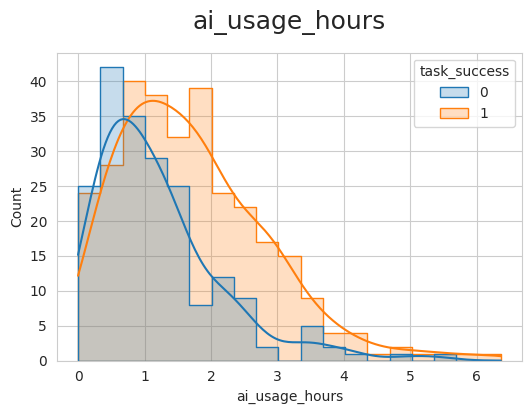

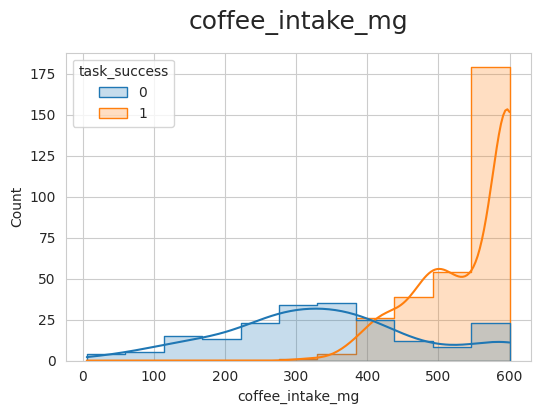

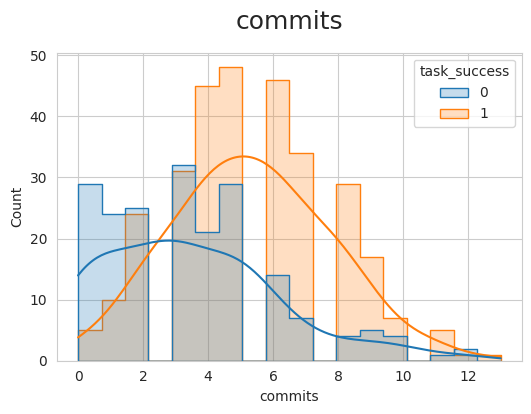

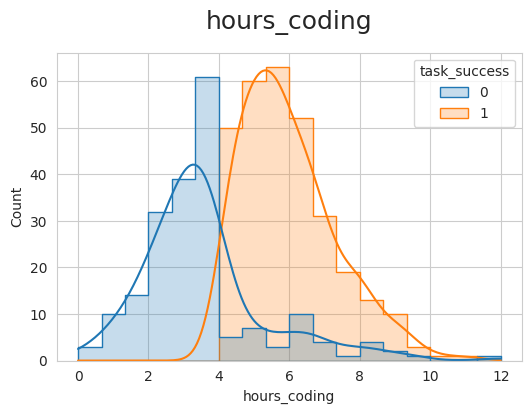

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=18, y=1.05)
    plt.show()


target_var = 'task_success'
for col in relevant_vars:
    plot_numerical(df_eda, col, target_var)
    print("\n\n")

# Conclusion

* Counter to our hypothesis sleep_hours and distractions are not as relevant to task_success as other variables.
* The most relevant factors are caffeine_intake_mg and hours_coding which show a strong positive correlation to task_success.
* ai_usage shows weak correlation to task success. However, at 2-hour mark of AI usage the data shows the biggest discrepancy between task success and no task success suggesting that this might be the sweet spot for AI usage.